## Observations and Insights 

In [ ]:
#Observations:
#It seems like there is a strong correlation between a rats weight and their tumor volume

#The data for Ramicane and Capomulin is likely more reliable, since more time was spend observing results

#The data accounts for any possible influence that the mice's sex may have had, since the test group was split
#almost perfectly down the middle

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
len(merged_df['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#creates a dataframe containing only duplicated data
duped_info_df = merged_df.loc[merged_df.duplicated(subset=['Mouse ID','Timepoint'])]

#returns any and all Mouse ID's tied to duplicated data
dupe_ids = duped_info_df['Mouse ID'].unique().tolist()

#uses .isin to compare our list of id's to the entire series 'Mouse ID'
is_dupe = merged_df['Mouse ID'].isin(dupe_ids)

#gets the index for the data we need to drop
dupe_index = merged_df.loc[is_dupe].index

#drops data associated with the duplicate mouse ID
cleaned_df = merged_df.drop(labels=dupe_index)



#checks to see if the mouse ID tied to the duplicate data is still present
#cleaned_df.loc[cleaned_df['Mouse ID'].isin(dupe_ids)]


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mouse_data = merged_df.loc[is_dupe]
dupe_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

cleaned_df.describe()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_group = cleaned_df[['Drug Regimen','Tumor Volume (mm3)']].groupby(['Drug Regimen'])

regimen_mean = regimen_group.mean()['Tumor Volume (mm3)']
regimen_median = regimen_group.median()['Tumor Volume (mm3)']
regimen_var = regimen_group.var()['Tumor Volume (mm3)']
regimen_std = regimen_group.std()['Tumor Volume (mm3)']
regimen_sem = regimen_group.sem()['Tumor Volume (mm3)']

regimen_df = pd.DataFrame({
    'Mean Tumor Volume (mm3)':regimen_mean,
    'Median Tumor Volume (mm3)':regimen_median,
    'Var of Tumor Volume (mm3)':regimen_var,
    'Std Dev of Tumor Volume (mm3)':regimen_std,
    'SEM of Tumor Volume (mm3)':regimen_sem
})

regimen_df
#regimen_std

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Var of Tumor Volume (mm3),Std Dev of Tumor Volume (mm3),SEM of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen_agg_df = regimen_group.agg(['mean','median','var','std','sem'])
regimen_agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

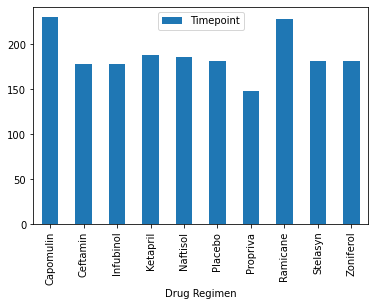

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

bar_base_df = cleaned_df[['Drug Regimen','Timepoint' ]].groupby(['Drug Regimen']).count()
bar_base_df.plot.bar()



([<matplotlib.axis.XTick at 0x1f9b10cc668>,
 <a list of 10 Text major ticklabel objects>)

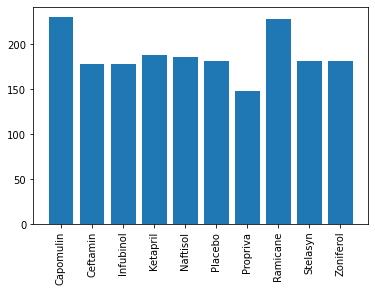

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = bar_base_df.index.to_list()

values = bar_base_df['Timepoint']

plt.bar(x_axis,values, align="center")
plt.xticks(x_axis,rotation='vertical')



array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F9B113FEF0>],
      dtype=object)

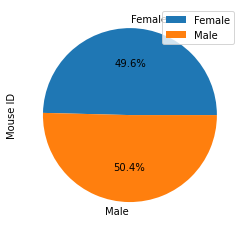

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex_group = cleaned_df[['Mouse ID','Sex']].drop_duplicates(keep='first').groupby('Sex')
mouse_sex_group.count().plot.pie(subplots=True, autopct="%1.1f%%")


([<matplotlib.patches.Wedge at 0x1f9b11c6c88>,
 [Text(0.013934097579311265, 1.0999117423341975, 'Female'),
  Text(-0.0139340975793114, -1.0999117423341975, 'Male')],
 [Text(0.007600416861442507, 0.5999518594550168, '49.6%'),
  Text(-0.007600416861442581, -0.5999518594550168, '50.4%')])

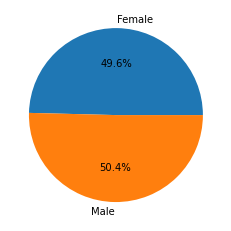

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mouse_sex_group.count().index.to_list()
sex_count = mouse_sex_group.count()['Mouse ID'].to_list()

plt.pie(sex_count, labels=labels, autopct="%1.1f%%")


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

temp_df = cleaned_df[['Mouse ID','Timepoint']]

max_timepoint_df = temp_df.groupby(['Mouse ID']).max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged_df = pd.merge(cleaned_df,max_timepoint_df,on='Mouse ID')

is_final_volume = merged_df['Timepoint_x'] == merged_df['Timepoint_y']

final_volume_df = merged_df.loc[is_final_volume]

final_volume_df = final_volume_df[['Mouse ID','Drug Regimen','Tumor Volume (mm3)']]
final_volume_df

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
9,k403,Ramicane,22.050126
19,s185,Capomulin,23.343598
29,x401,Capomulin,28.484033
39,m601,Capomulin,28.430964
49,g791,Ramicane,29.128472
...,...,...,...
1846,z314,Stelasyn,45.934712
1849,z435,Propriva,48.710661
1859,z581,Infubinol,62.754451
1869,z795,Naftisol,65.741070


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

final_volumes = []

for regimen in regimens:
    
    temp_df = final_volume_df.loc[final_volume_df['Drug Regimen']==regimen]
    
    volume = temp_df['Tumor Volume (mm3)']
    
    final_volumes.append(temp_df['Tumor Volume (mm3)'])
    
    quartiles = volume.quantile([.25, .5, .75])
    
    lowerq = quartiles[0.25]
    median = quartiles[0.5]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f'{regimen}')
    print(f'The lower quartile is {lowerq}.')
    print(f'The upper quartile is {upperq}.')
    print(f'The interquartile range is {iqr}.')
    print(f'The median is {median}.')
    
    lower_bound = lowerq-(1.5*iqr)
    upper_bound = upperq+(1.5*iqr)
    
    print(f'Values above {upper_bound} could be outliers.')
    print(f'Values below {lower_bound} could be outliers.')
    print('\n')
    
#final_volumes
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin
The lower quartile is 32.37735684.
The upper quartile is 40.1592203.
The interquartile range is 7.781863460000004.
The median is 38.125164399999996.
Values above 51.83201549 could be outliers.
Values below 20.70456164999999 could be outliers.


Ramicane
The lower quartile is 31.56046955.
The upper quartile is 40.65900627.
The interquartile range is 9.098536719999998.
The median is 36.56165229.
Values above 54.30681135 could be outliers.
Values below 17.912664470000003 could be outliers.


Infubinol
The lower quartile is 54.04860769.
The upper quartile is 65.52574285.
The interquartile range is 11.477135160000003.
The median is 60.16518046.
Values above 82.74144559000001 could be outliers.
Values below 36.83290494999999 could be outliers.


Ceftamin
The lower quartile is 48.72207785.
The upper quartile is 64.29983003.
The interquartile range is 15.577752179999997.
The median is 59.85195552.
Values above 87.66645829999999 could be outliers.
Values below 25.355449580000002 could

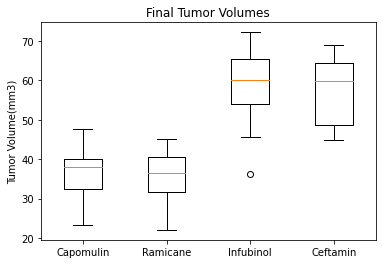

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title(f'Final Tumor Volumes')
ax1.set_ylabel('Tumor Volume(mm3)')
ax1.boxplot(final_volumes)
plt.xticks([1,2,3,4],regimens)
plt.show()

## Line and Scatter Plots

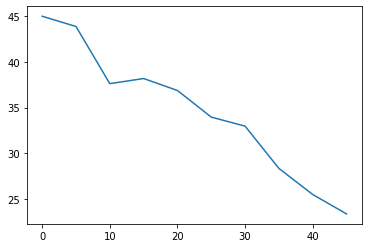

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#mouse id = s185

s185_df = cleaned_df.loc[cleaned_df['Mouse ID']=='s185']

x_axis = s185_df['Timepoint']
y_axis = s185_df['Tumor Volume (mm3)']

plt.plot(x_axis,y_axis)

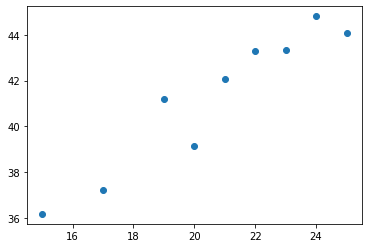

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_df = cleaned_df.loc[cleaned_df['Drug Regimen']=='Capomulin']

cap_group = cap_df[['Weight (g)','Tumor Volume (mm3)']].groupby(['Weight (g)'])
x_axis = cap_group.mean().index
y_axis = cap_group.mean()['Tumor Volume (mm3)']


plt.scatter(x_axis,y_axis)

## Correlation and Regression

The correlation coefficient is: 0.950524396185527
y = 0.89x + 22.76


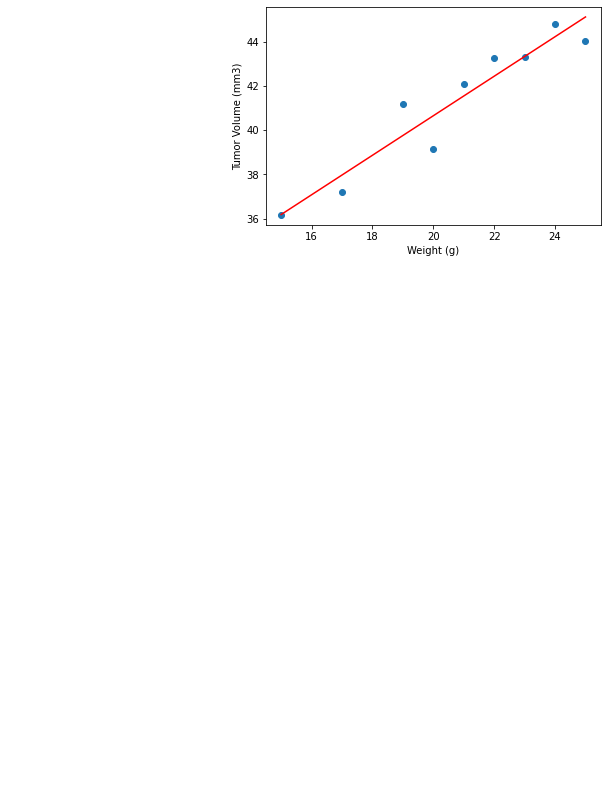

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = x_axis
y_values = y_axis


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The correlation coefficient is: {rvalue}")
print(line_eq)
plt.show()
